---
format:
  html:
    self-contained: true
---


Our dataset consists of clinical data from patients who entered the hospital complaining of chest pain ("angina") during exercise.  The information collected includes:

* `age` : Age of the patient

* `sex` : Sex of the patient

* `cp` : Chest Pain type

    + Value 0: asymptomatic
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
   
    
* `trtbps` : resting blood pressure (in mm Hg)

* `chol` : cholesterol in mg/dl fetched via BMI sensor

* `restecg` : resting electrocardiographic results

    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* `thalach` : maximum heart rate achieved during exercise

* `output` : the doctor's diagnosis of whether the patient is at risk for a heart attack
    + 0 = not at risk of heart attack
    + 1 = at risk of heart attack

In [ ]:
## library imports here
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score

In [ ]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")
ha

,age,sex,cp,trtbps,chol,restecg,thalach,output
0,63,1,3,145,233,0,150,1
1,37,1,2,130,250,1,187,1
2,56,1,1,120,236,1,178,1
3,57,0,0,120,354,1,163,1
4,57,1,0,140,192,1,148,1
...,...,...,...,...,...,...,...,...
268,59,1,0,164,176,0,90,0
269,57,0,0,140,241,1,123,0
270,45,1,3,110,264,1,132,0
271,68,1,0,144,193,1,141,0


## Q1: Natural Multiclass Models

Fit a multiclass KNN, Decision Tree, and LDA for the heart disease data; this time predicting the type of chest pain (categories 0 - 3) that a patient experiences.  For the decision tree, plot the fitted tree, and interpret the first couple splits.


In [ ]:
X = ha[["age", "sex", "trtbps", 'chol', 'restecg', 'thalach']]
y = ha['cp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex", "restecg"]),
    ("standardize", StandardScaler(), ['chol', 'trtbps', 'age', 'thalach'])
  ],
  remainder = "drop"
)

In [ ]:
#KNN
K = 5

knn_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ('classification', KNeighborsClassifier(n_neighbors=K))
    ]
)

knn = knn_pipeline.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

confusion_knn = confusion_matrix(y_test, knn_pred)
print(confusion_knn)

accuracy = accuracy_score(y_test, knn_pred)
print(accuracy)

[[19  0  3  0]
 [ 6  1  1  0]
 [13  2  5  0]
 [ 5  0  0  0]]
0.45454545454545453


In [ ]:
#Decision Tree
tree_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ('classification', DecisionTreeClassifier(random_state=1))
    ]
)

tree = tree_pipeline.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

confusion_tree = confusion_matrix(y_test, tree_pred)
print(confusion_tree)

accuracy = accuracy_score(y_test, tree_pred)
print(accuracy)

[[15  3  4  0]
 [ 6  2  0  0]
 [ 9  2  7  2]
 [ 0  4  1  0]]
0.43636363636363634


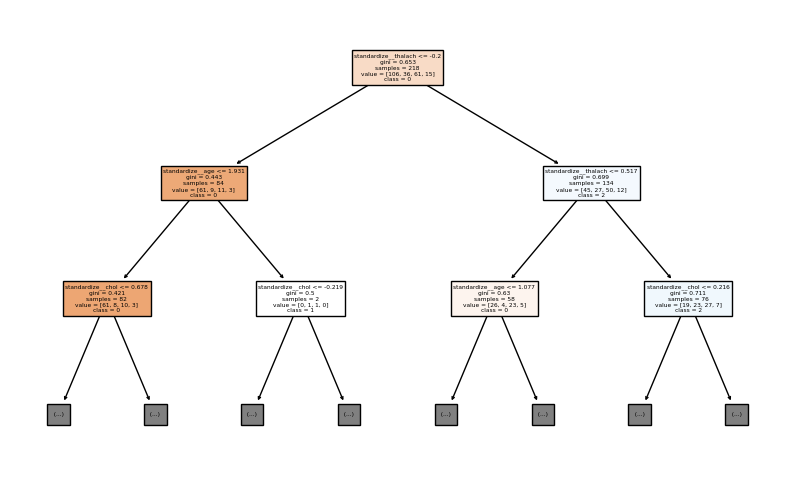

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

decision_tree_model = tree_pipeline.named_steps['classification']

plt.figure(figsize=(10, 6))
plot_tree(decision_tree_model, filled=True, feature_names=ct.get_feature_names_out(), class_names=['0', '1','2','3'], max_depth=2)
plt.show()

In [ ]:
#LDA
lda_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ('classification', LinearDiscriminantAnalysis())
    ]
)

lda = lda_pipeline.fit(X_train, y_train)
lda_pred = lda.predict(X_test)

confusion_lda = confusion_matrix(y_test, lda_pred)
print(confusion_lda)

accuracy = accuracy_score(y_test, lda_pred)
print(accuracy)

[[19  0  3  0]
 [ 3  1  4  0]
 [13  2  5  0]
 [ 2  0  3  0]]
0.45454545454545453


## Q2:  OvR

Create a new column in the `ha` dataset called `cp_is_3`, which is equal to `1` if the `cp` variable is equal to `3` and `0` otherwise.

Then, fit a Logistic Regression to predict this new target, and report the **F1 Score**.

Repeat for the other three `cp` categories.  Which category was the OvR approach best at distinguishing?

In [ ]:
ha['cp_is_3'] = (ha['cp'] == 3).astype(int)
ha['cp_is_2'] = (ha['cp'] == 2).astype(int)
ha['cp_is_1'] = (ha['cp'] == 1).astype(int)
ha['cp_is_0'] = (ha['cp'] == 0).astype(int)
ha

,age,sex,cp,trtbps,chol,restecg,thalach,output,cp_is_3,cp_is_2,cp_is_1,cp_is_0
0,63,1,3,145,233,0,150,1,1,0,0,0
1,37,1,2,130,250,1,187,1,0,1,0,0
2,56,1,1,120,236,1,178,1,0,0,1,0
3,57,0,0,120,354,1,163,1,0,0,0,1
4,57,1,0,140,192,1,148,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
268,59,1,0,164,176,0,90,0,0,0,0,1
269,57,0,0,140,241,1,123,0,0,0,0,1
270,45,1,3,110,264,1,132,0,1,0,0,0
271,68,1,0,144,193,1,141,0,0,0,0,1


In [ ]:
log_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ('classification', LogisticRegression())
    ]
)

y = ha['cp_is_3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

log = log_pipeline.fit(X_train, y_train)
log_pred = log.predict(X_test)

f1 = f1_score(y_test, log_pred, average = 'weighted')
print(f1)

0.8658008658008657


In [ ]:
y = ha['cp_is_2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

log = log_pipeline.fit(X_train, y_train)
log_pred = log.predict(X_test)

f1 = f1_score(y_test, log_pred, average = 'weighted')
print(f1)

0.535142759861861


In [ ]:
y = ha['cp_is_1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

log = log_pipeline.fit(X_train, y_train)
log_pred = log.predict(X_test)

f1 = f1_score(y_test, log_pred, average = 'weighted')
print(f1)

0.7875222816399287


In [ ]:
y = ha['cp_is_0']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

log = log_pipeline.fit(X_train, y_train)
log_pred = log.predict(X_test)

f1 = f1_score(y_test, log_pred, average = 'weighted')
print(f1)

0.6747282608695652


This model was best at predicting whether cp was 3, as that had the highest f1 score

## Q3: OvO

Reduce your dataset to only the `0` and `1` types of chest pain.

Then, fit a Logistic Regression to predict between the two groups, and report the **ROC-AUC**.  

Repeat comparing category `0` to `2` and `3`.  Which pair was the OvO approach best at distinguishing?

In [ ]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")
ha1 = ha[(ha['cp'] == 0) | (ha['cp'] == 1)]
ha1

,age,sex,cp,trtbps,chol,restecg,thalach,output
2,56,1,1,120,236,1,178,1
3,57,0,0,120,354,1,163,1
4,57,1,0,140,192,1,148,1
5,56,0,1,140,294,0,153,1
6,44,1,1,120,263,1,173,1
...,...,...,...,...,...,...,...,...
267,63,0,0,124,197,1,136,0
268,59,1,0,164,176,0,90,0
269,57,0,0,140,241,1,123,0
271,68,1,0,144,193,1,141,0


In [ ]:
X = ha1[["age", "sex", "trtbps", 'chol', 'restecg', 'thalach']]
y = ha1['cp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

log = log_pipeline.fit(X_train, y_train)
log_pred = log.predict(X_test)

prob = log.predict_proba(X_test)[:,1]
roc_auc_score(y_test, prob)

0.8484848484848485

In [ ]:
ha2 = ha[(ha['cp'] == 0) | (ha['cp'] == 2)]

X = ha2[["age", "sex", "trtbps", 'chol', 'restecg', 'thalach']]
y = ha2['cp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

log = log_pipeline.fit(X_train, y_train)
log_pred = log.predict(X_test)

prob = log.predict_proba(X_test)[:,1]
roc_auc_score(y_test, prob)

0.7551487414187643

In [ ]:
ha3 = ha[(ha['cp'] == 0) | (ha['cp'] == 3)]

X = ha3[["age", "sex", "trtbps", 'chol', 'restecg', 'thalach']]
y = ha3['cp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

log = log_pipeline.fit(X_train, y_train)
log_pred = log.predict(X_test)

prob = log.predict_proba(X_test)[:,1]
roc_auc_score(y_test, prob)

0.6790123456790124

This time, we did the best at distinguishing between 0 and 3